## Práctica 4. Introducción a la visualizaciones de redes de vínculos en R


## Introducción

En la práctica anterior vimos cómo visualizar grafos y analizar redes.  En esta ocasión aprenderemos a utilizar algunas librerías de R que se integran a ggplot. También aprenderemos a desplegar redes jerárquicas en R.


### Entregables

La práctica se hace por equipos. Se entrega un documento con:

* Todas las preguntas solicitadas en este documento;

* Todas las capturas de grafos solicitadas;

* El código de los scripts generados

  

## I. Visualización de grafos con Ggraph

ggraph es una extensión de `ggplot2` para graficar estructuras de datos relacionales tales como redes, grafos y árboles. Si bien sigue las ideas de base de `ggplot2` y su API, integra su propio conjunto de geoms, facets, etc. y añade el concepto de *planos o diseños* (*layouts*) a la gramática de `ggplot2`.

Utiliza varias de las funciones de `igraph`, un poderoso paquete de R para análisis de grafos. Proporciona una amplia gama de herramientas para la manipulación y el  análisis de datos de redes, como cálculos de centralidad, detección de  comunidades, búsqueda de caminos más cortos, entre otros.



#### 1. Preparación de datos

1. Como en la práctica anterior, abra un nuevo proyecto en Gephi y abra el archivo `LadaFacebookAnon.gdf`.
2. Desde el Laboratorio de datos, exporte la tabla de Nodos como un archivo csv con el nombre `NodosLadaFB.csv` y la tabla de Aristas en un archivo con el nombre `OrillasLadaFB.csv`. **Debe seleccionar la tabla correspondiente en el menú de opciones**.



#### 2. Carga y visualización de las orillas

1. Abra RStudio y asegúrese que los archivos que descargó en el punto anterior, están en el directorio activo de RStudio.
2. Lea el archivo `OrillasLadaFB.csv`  y guárdelo en un dataframe `orillas`.  De una vez cargue las librerías que necesitará más adelante:


In [19]:
library(igraph)
library(ggplot2)

In [5]:
install.packages('igraph',dependencies = TRUE)
install.packages('ggraph',dependencies = TRUE)

Warning message:
"dependency 'graph' is not available"



The downloaded binary packages are in
	/var/folders/81/3z5tmwbd7sq0s2qmqph5c0c80000gn/T//Rtmp3bzNjP/downloaded_packages


also installing the dependencies 'coda', 'iterators', 'permute', 'polyclip', 'RcppEigen', 'RcppArmadillo', 'statnet.common', 'ca', 'foreach', 'gclus', 'qap', 'registry', 'TSP', 'vegan', 'lwgeom', 'ggforce', 'ggrepel', 'tidygraph', 'graphlayouts', 'network', 'seriation', 'deldir', 'covr', 'sfnetworks'




In [21]:
library(ggraph)
library(igraph)
orillas <- read.csv("OrillasLadaFB.csv", header = T) # En g estamos guardando las edges

Creamos un objeto grafo a partir del dataframe  y lo graficamos con los valores por omisión:

Using "sugiyama" as default layout


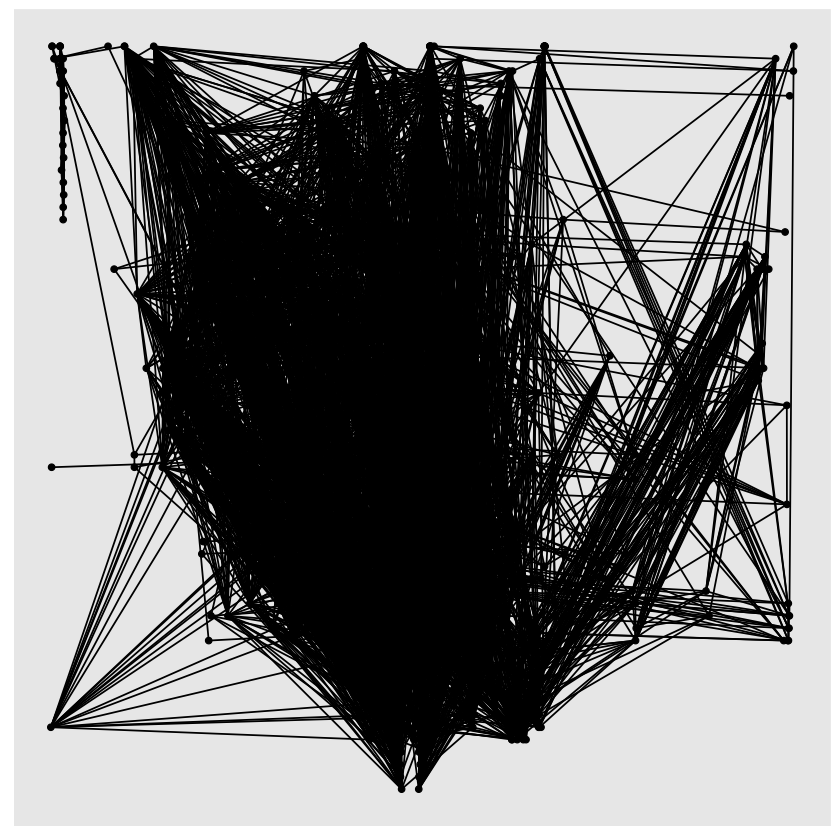

In [7]:
g <- graph_from_data_frame(orillas) 


ggraph(g) + geom_node_point() +
  geom_edge_link()

![](https://drive.google.com/uc?export=view&id=1dlWTuvaS8y9MQDDJAxscdEoY-488103-)

La gráfica resultante, como las primeras en Gephi, es bastante inútil, excepto quizás que en esta ocasión vemos con más claridad los nodos que están más alejados y relativamente aislados.

---

**PREGUNTA 1.** ¿Por qué se despliegan nodos si estamos trabajando con un archivo de aristas?

---



ggraph tiene una gran cantidad de opciones para desplegar los grafos. Una, basada en algoritmos de fuerza dirigida, es `kk`.  Vamos a utilizarlo y además cambiemos el color de los nodos y de las aristas:

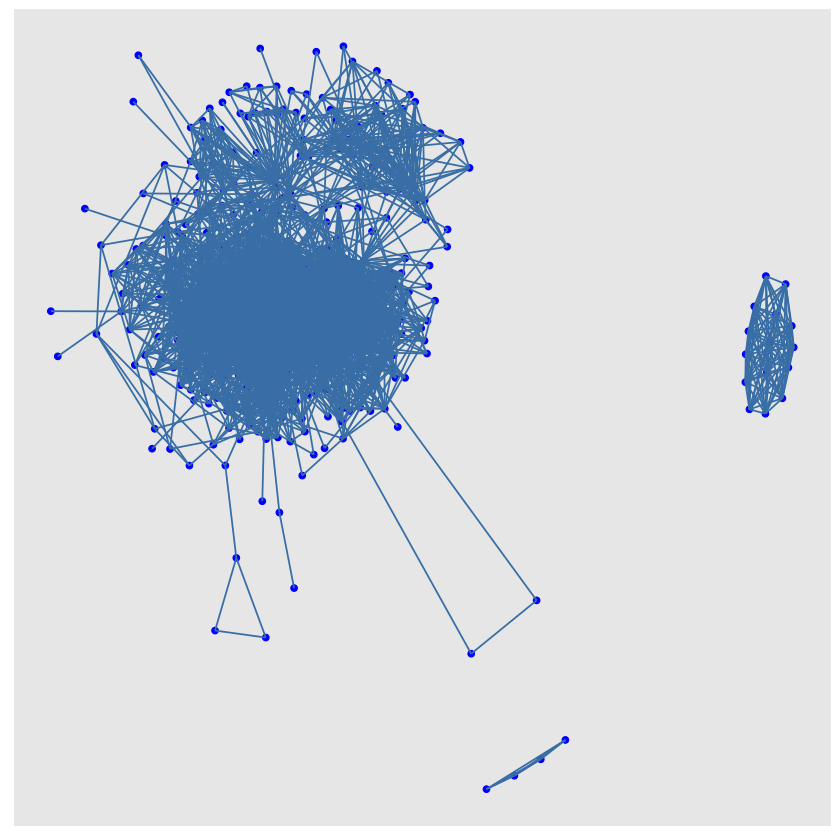

In [8]:
ggraph(g, layout='kk') + geom_node_point(color='blue') +
  geom_edge_link(color='steelblue') #Layout es par elegir como lo desplegamos 



---

**PREGUNTA 2.** Muestre la gráfica resultante

---



Para la mayoría de los planos se pueden especificar opciones. Veamos un ejemplo:

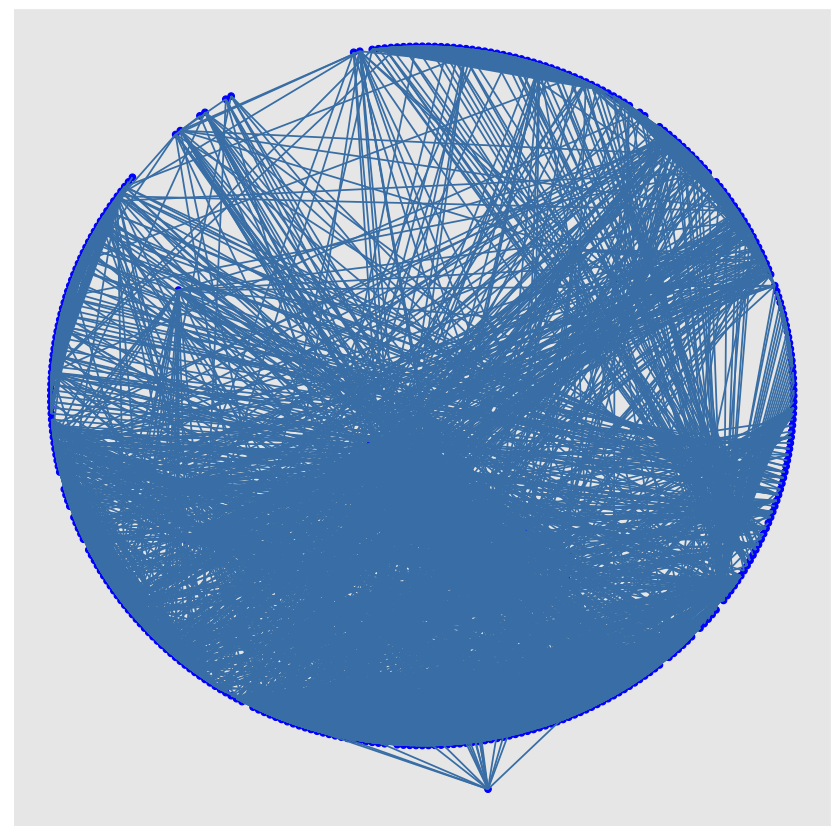

In [9]:
ggraph(g, layout='kk',maxiter=100) + geom_node_point(color='blue') +
  geom_edge_link(color='steelblue') #!El parametro que cambia es maxitter

## Pregunta 4

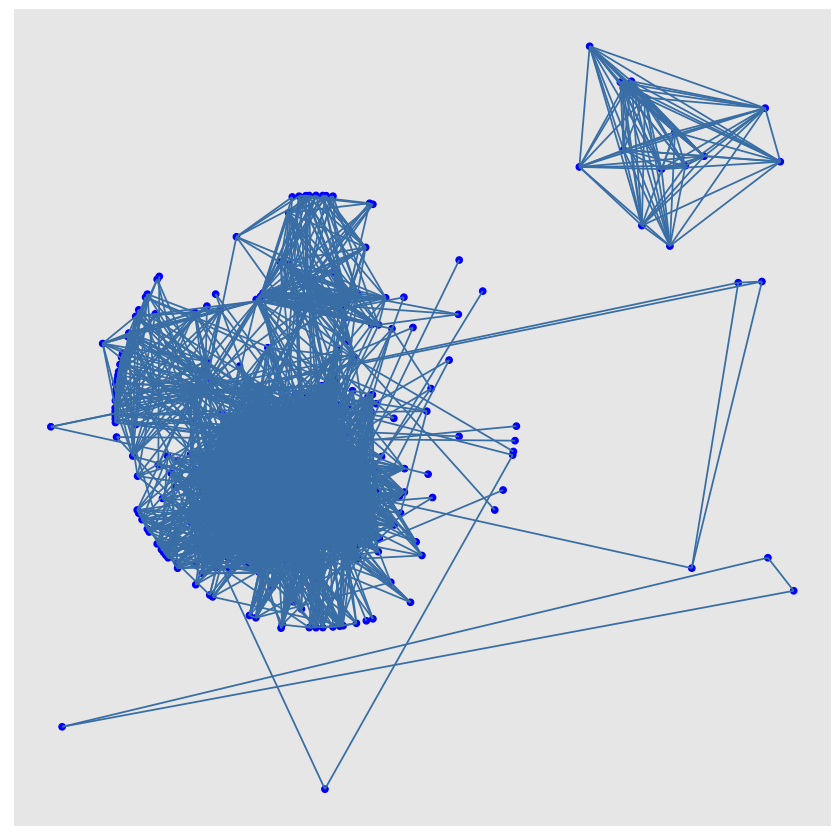

In [10]:
ggraph(g, layout = "kk", maxiter = 750) + geom_node_point(color = "blue") +
    geom_edge_link(color = "steelblue")



---

**PREGUNTA 3**. Muestre la gráfica resultante

---



---

**PREGUNTA 4**. Cambie maxiter a 750 y muestre la gráfica resultante

---



El archivo de aristas no tiene mucha información de valor. Carguemos también el archivo de nodos y creemos un grafo a partir de los dos.  Ahora podemos asignar un canal visual a una variable categórica, por ejemplo, distinguir el género en función de la tonalidad:

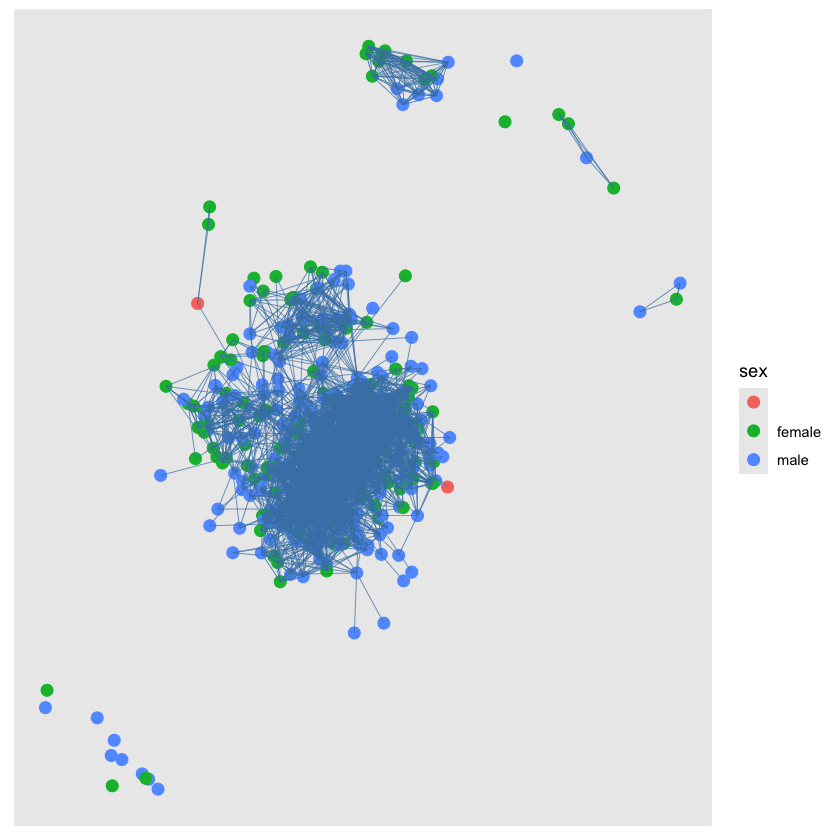

In [11]:
nodos <- read.csv("NodosLadaFB.csv",header=T)
#Primero guardas el csv de nodos y orillas

#* En g a partir de los dos tablas haces el nodo
g <- graph_from_data_frame(d=orillas,v=nodos) 

ggraph(g,layout='kk') + geom_node_point(aes(color=sex),size=3) + #* En geom_node pones como quieres rellenarlo
  geom_edge_link(width = .2, color = 'steelblue')


## Pregunta 6

Warning message:
"Using size for a discrete variable is not advised."


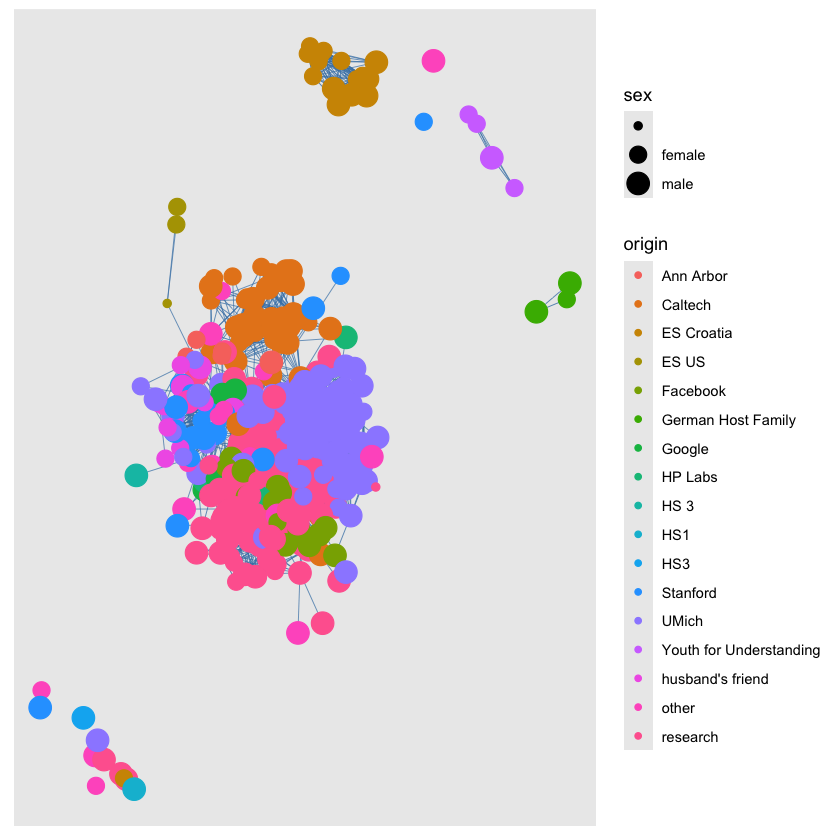

In [20]:

ggraph(g, layout = "kk") + geom_edge_link(width = .2, color = "steelblue")+geom_node_point(aes(color = origin, size = sex))


In [14]:
head(orillas)
head(nodos)

,Source,Target,Type,Id,Label,Weight
,<int>,<int>,<chr>,<int>,<lgl>,<int>
1,23169,23305,Undirected,51413,NA,1
2,23169,23347,Undirected,51438,NA,1
3,23305,23347,Undirected,51991,NA,1
4,23159,23197,Undirected,51263,NA,1
5,23159,23246,Undirected,51355,NA,1
6,23159,23247,Undirected,51356,NA,1


,Id,Label,sex,agerank,wallcount,locale,modularityclass,origin,modularity_class,degree,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality
,<int>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,23131,Michael,male,221,257,en_US,2,other,0,0,0,0,0,0
2,23145,Jason,male,207,NA,en_US,3,HS1,1,0,0,0,0,0
3,23166,Christopher,male,186,134,en_US,6,other,2,0,0,0,0,0
4,23192,David,male,160,5,en_US,7,other,3,0,0,0,0,0
5,23229,Jennifer,female,123,133,en_US,9,Stanford,4,0,0,0,0,0
6,23242,James,male,110,183,en_US,11,other,5,0,0,0,0,0




---

**PREGUNTA 5.** Muestre la gráfica resultante



**PREGUNTA 6.** Ahora distinga por el origen de la relación con el canal visual de tonalidad y el género por el tamaño del punto.  Para que las líneas no obstruyan a los nodos, grafique primero las líneas. Muestre la gráfica resultante.

---



#### 3. Cálculo de estadísticas

Vamos a utilizar algunas de las funciones de igraph para calcular estadísticas sobre nuestro grafo. Empecemos por calcular el grado de los nodos y asignarlo como un nuevo atributo:

In [21]:
V(g)$grado=degree(g)
summary(g)

IGRAPH efa1ff5 DN-- 388 3598 -- 
+ attr: name (v/c), Label (v/c), sex (v/c), agerank (v/n), wallcount
| (v/n), locale (v/c), modularityclass (v/n), origin (v/c),
| modularity_class (v/n), degree (v/n), Eccentricity (v/n),
| closnesscentrality (v/n), harmonicclosnesscentrality (v/n),
| betweenesscentrality (v/n), grado (v/n), Type (e/c), Id (e/n), Label
| (e/l), Weight (e/n)


## Pregunta 8

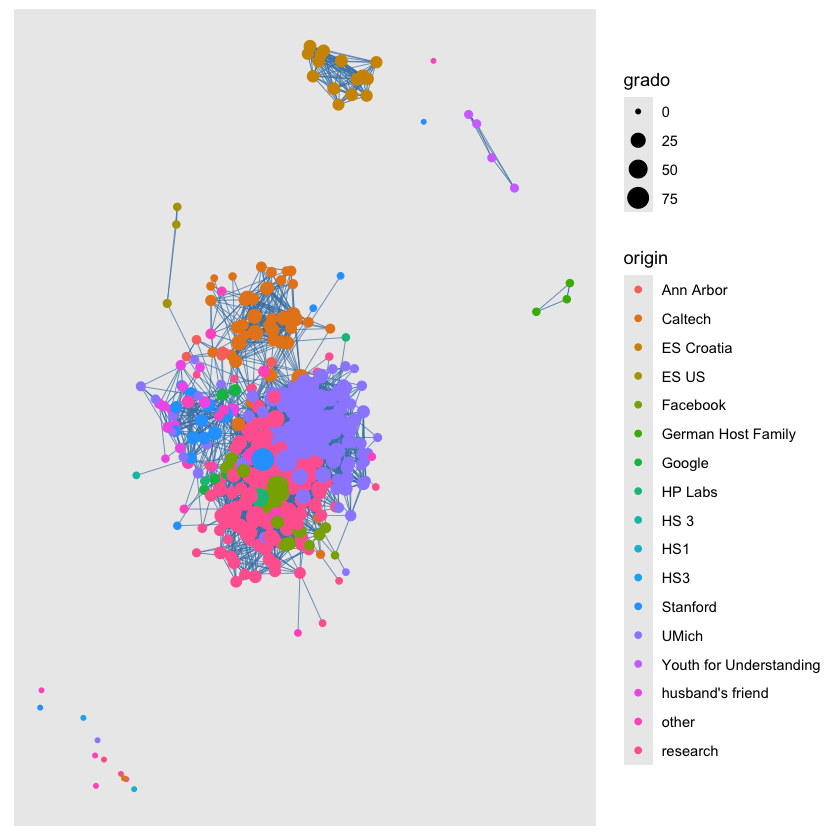

In [22]:
ggraph(g, layout = "kk") + geom_edge_link(width = .2, color = "steelblue") + geom_node_point(aes(color = origin, size = grado))


## Pregunta 9

In [23]:
max(degree(g)) #La que más tiene es 93

[1] 93

**PREGUNTA 7.** Interprete el resultado del último comando y verifique que, en efecto, se tiene un nuevo atributo "grado".

---



---

**PREGUNTA 8.** Despliegue una gráfica en la que el diámetro del punto se asocia al grado del nodo y la tonalidad al origen.  

---



---

**PREGUNTA 9.** ¿Cuál es el nodo con el mayor grado? ¿Cuál es ese grado?   (Ayuda: El máximo grado se obtiene con `max(degree(g))`

---



Veamos la distribución de grados:

In [24]:
library(ggplot2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


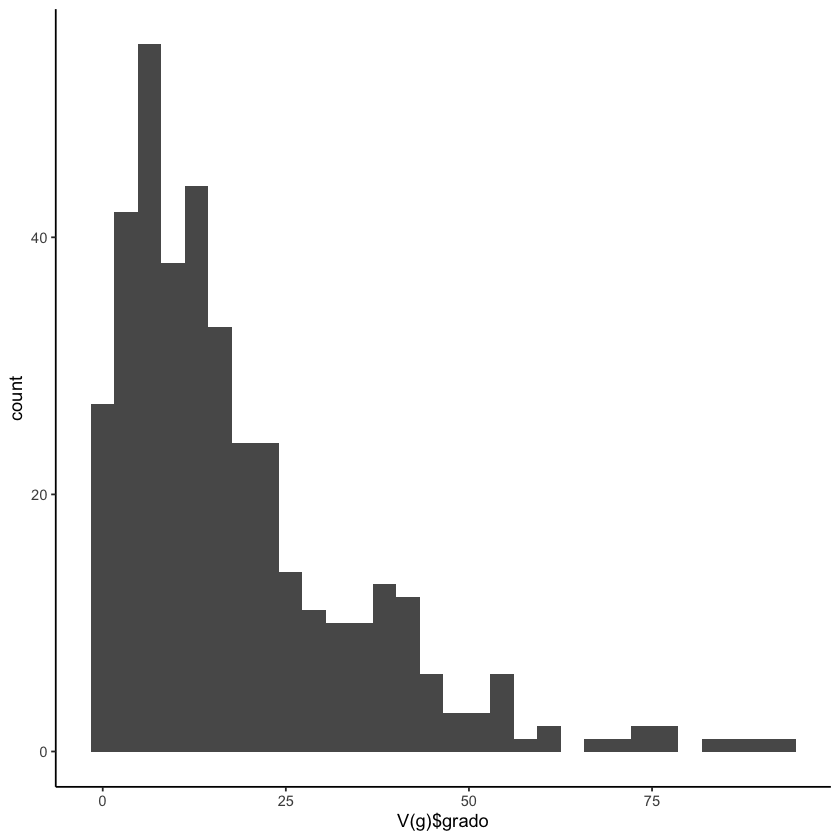

In [25]:
ggplot()+geom_histogram(aes(V(g)$grado))+theme_classic()

#La diferencia se debe al ancho de los bins

## Pregunta 11

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


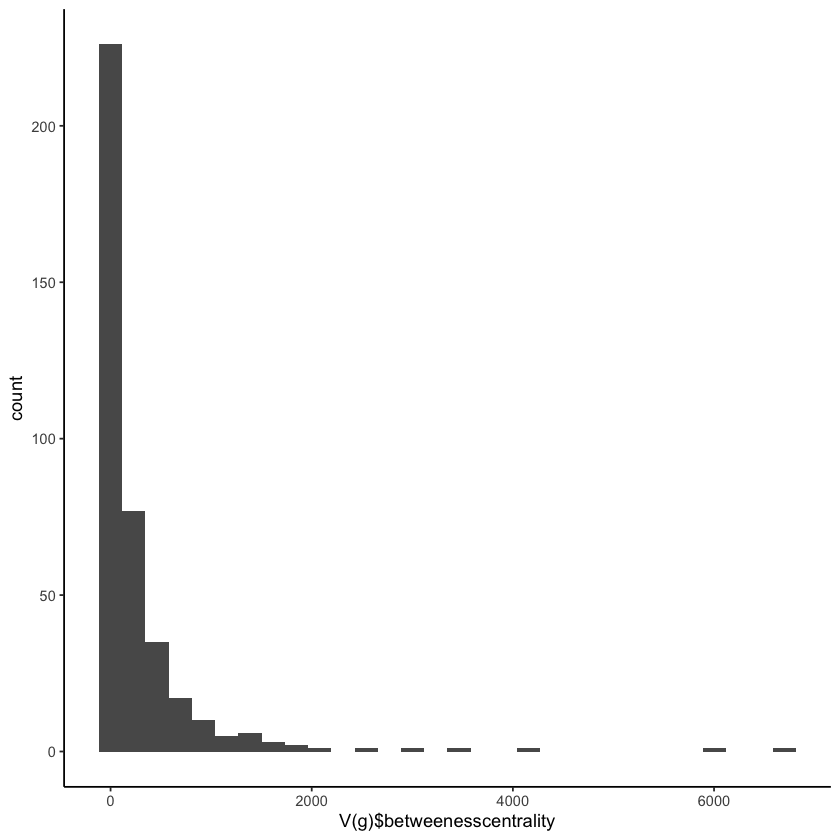

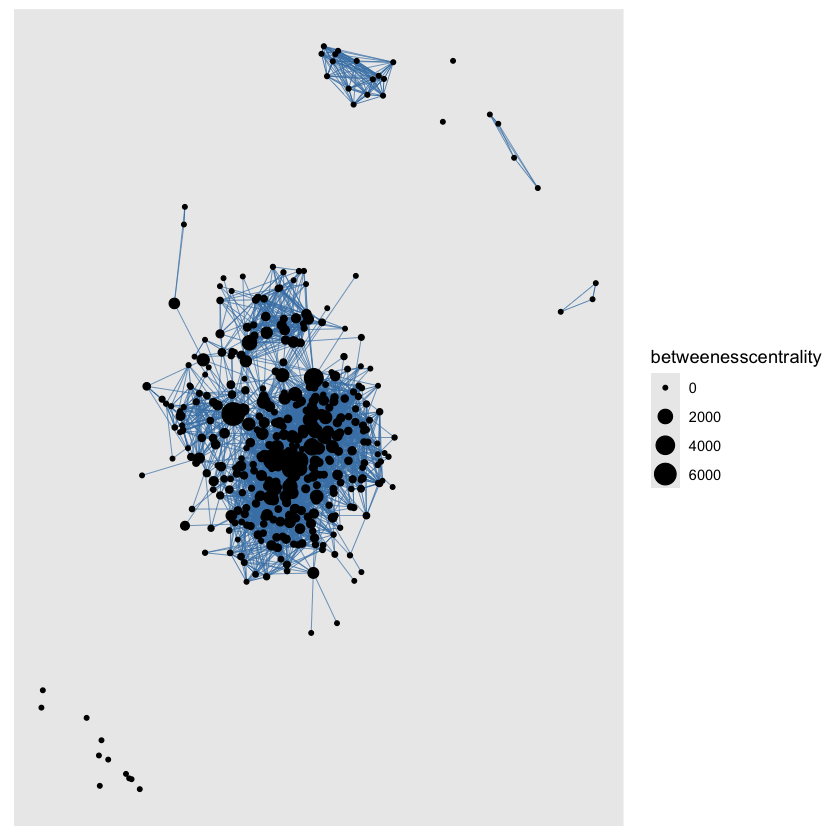

In [42]:
ggplot() +
    geom_histogram(aes(V(g)$betweenesscentrality)) +
    theme_classic()

ggraph(g, layout = "kk") + geom_edge_link(width = .2, color = "steelblue") + geom_node_point(aes(size = betweenesscentrality))






---

**PREGUNTA 10.** Compare esta distribución con la que obtuvo con Gephi.  También compare el grado medio

Si encuentra diferencias, ¿a qué cree que se deba?

---



La intermediación (''betweenness'') de los nodos se calcula con la funcion `betweenness`.  

---

**PREGUNTA 11.** Calcule la intermediación del grafo y despliegue un histograma.
También despliegue un grafo en el que el tamaño del nodo es proporcional a su intermediación

¿Cuál es el nodo con la máxima intermediación?

----




Para no quedarnos con una idea pobre de ggraph, tomaremos los datasets `schoolNodes.csv` y `schoolEdges.csv` que tiene información anonimizada de una escuela danesa.

1. Lea los dos archivos y genere una gráfica con ellos.
2. Resaltemos el uso de alcohol en la escuela:



In [45]:
nodesS <- read.csv("schoolNodes.csv")
edgesS <- read.csv("schoolEdges.csv")

head(nodesS)
head(edgesS)

g <- graph_from_data_frame(d=edgesS,v=nodesS) 


,name,delinquency,alcohol_use,sex,age,ethnicity,religion
,<int>,<int>,<int>,<chr>,<int>,<int>,<int>
1,1,2,4,F,12,1,2
2,2,NA,2,F,12,1,2
3,3,2,1,F,12,2,3
4,4,2,1,M,12,1,2
5,5,1,1,M,12,1,2
6,6,1,1,F,12,1,NA


,from,to,type
,<int>,<int>,<chr>
1,1,3,friendship
2,1,12,friendship
3,3,1,friendship
4,3,2,friendship
5,3,6,friendship
6,3,7,friendship


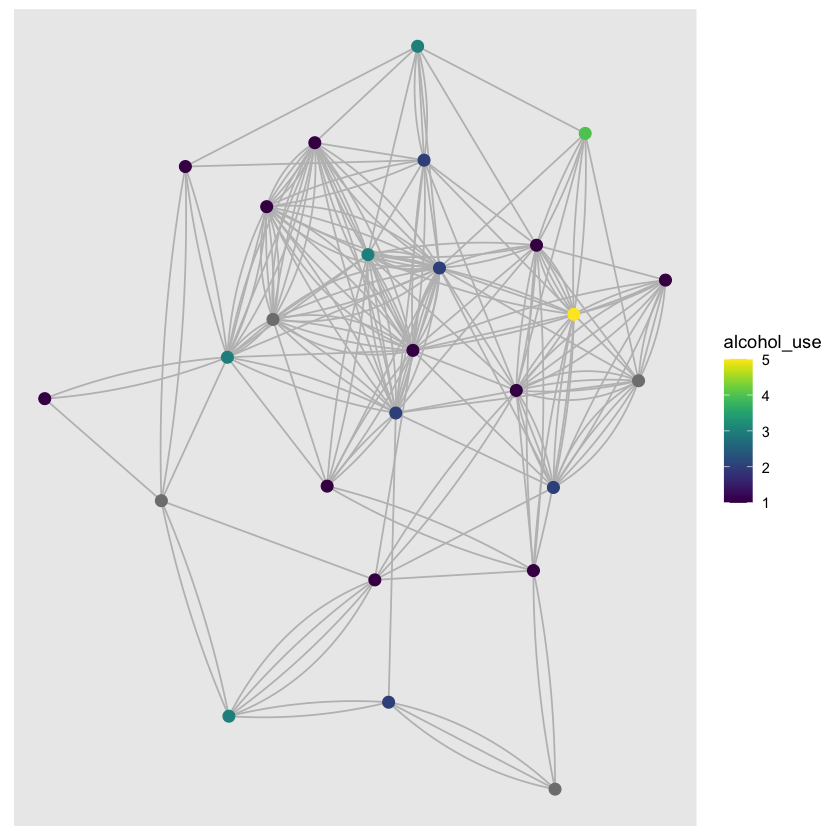

In [46]:
ggraph(g,layout = 'stress') +
  geom_edge_fan(width = .5, color = 'gray') +
  geom_node_point(aes(color=alcohol_use), size = 3) +
  scale_color_viridis()



---

**PREGUNTA 12.** Muestre la gráfica resultante

---



Ahora ejecute el siguiente código:

Warning message:
"Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`)."


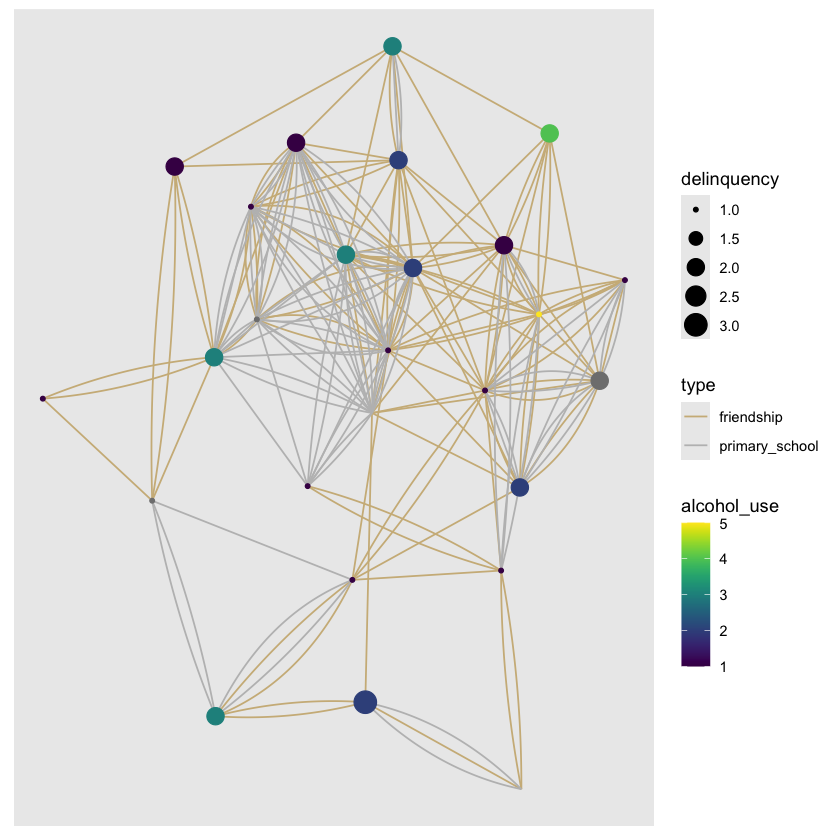

In [47]:
ggraph(g,layout = 'stress') +
  geom_edge_fan(aes(color=type), width = .5) +
  geom_node_point(aes(color=alcohol_use, size = delinquency)) +
  scale_color_viridis() +
  scale_edge_color_manual(values = c('friendship' = '#ceb888', 'primary_school' = 'gray'))

 #* Tiene demasiados marcadores. No es muy clara 



---

**PREGUNTA 13.** Explique muy brevemente qué hace el código y muestre la gráfica resultante.

¿Qué opinión le merece esta gráfica en cuanto a la claridad y eficiencia para comunicar información?

---



## II. Visualizaciones de relaciones jerárquicas

Además de los grafos, ggraph ofrece diseños para desplegar redes de vínculos como árboles, mapas rectangulares y circulares. Estas visualizaciones pueden mostrar relaciones estrictamente jerárquicas, o de agrupamientos.



### Relaciones estrictamente jerárquicas

En el siguiente segmento de código se muestra el desplegado con un dendrograma de un organigrama de una institución.

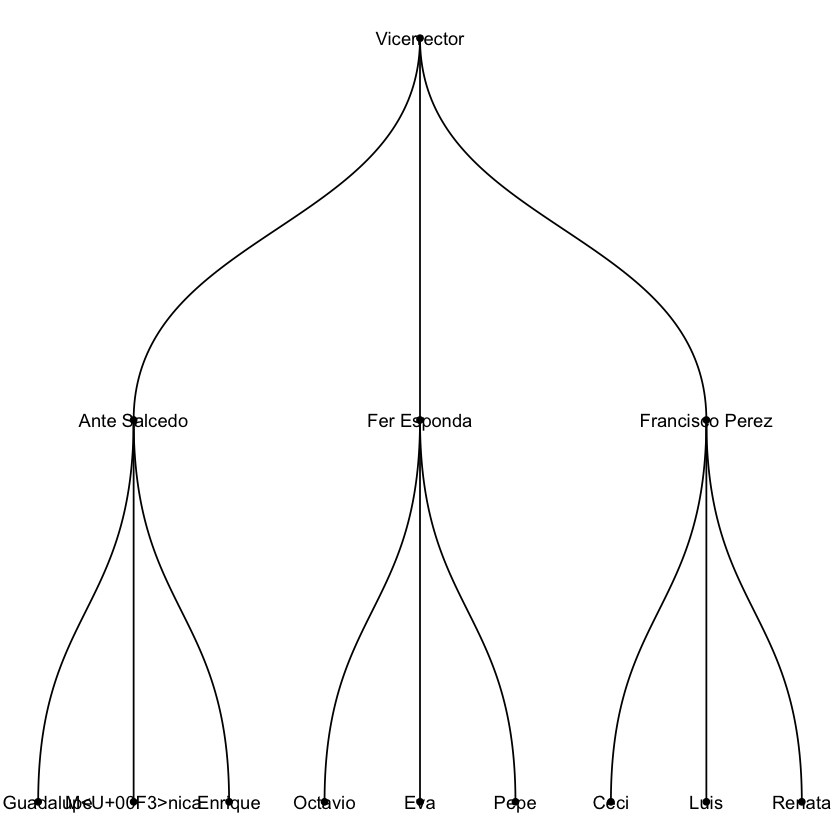

In [50]:
# Crea lista de orillas a partir de la estructura jerárquica
d1 <- data.frame(from="Vicerrector", to=c("Ante Salcedo", "Fer Esponda", "Francisco Perez"))
d2 <- data.frame(from=rep(d1$to, each=3), to=c("J. Guadalupe","Mónica","Enrique", "Octavio","Eva","Pepe","Ceci","Luis","Renata"))

orillas <-rbind(d1,d2)

# Crea el objeto
g2 <- graph_from_data_frame(orillas)

#... y lo desplegamos
ggraph(g2,'dendrogram')+
  geom_edge_diagonal()+
  geom_node_point()+
  geom_node_text(aes( label=name)) +
  theme_void()



---

**PREGUNTA 14.** Muestre la gráfica resultante

---



Este es el código para hacer una gráfica circular:

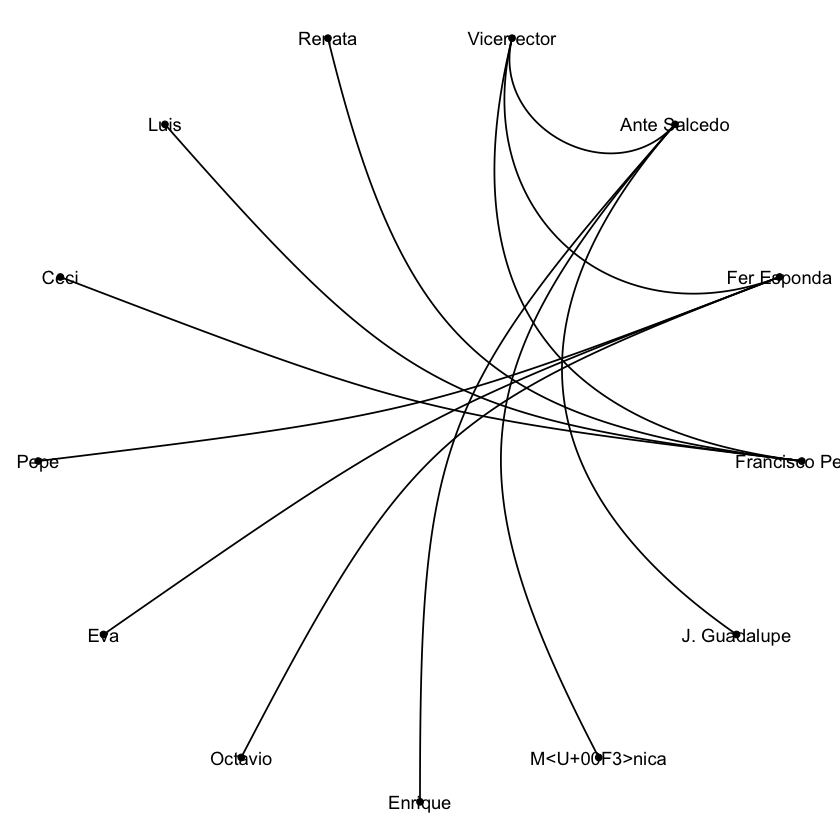

In [53]:
ggraph(g2, layout = 'linear',circular=T) +
  geom_node_point()+
  geom_node_text(aes( label=name)) +
  geom_edge_arc()+
  theme_void()

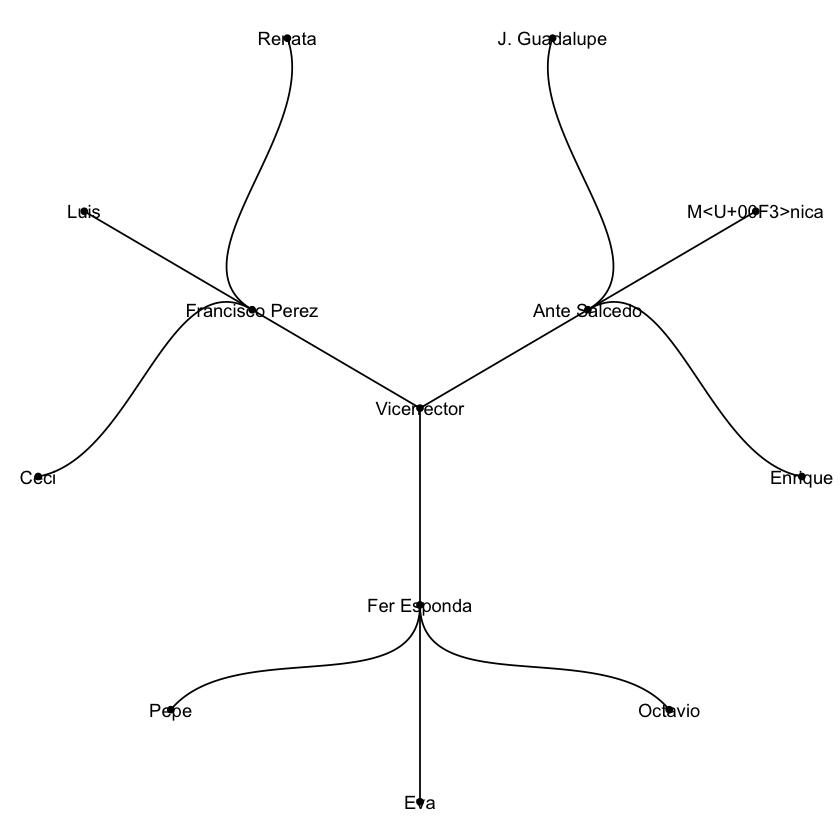

In [61]:
ggraph(g2, "dendrogram", circular= TRUE) +
    geom_edge_diagonal() +
    geom_node_point() +
    geom_node_text(aes(label = name)) +
    theme_void()



---

**PREGUNTA 17.** Modifique el código para que la gráfica aparezca un poco más elegante.

Muestre la gráfica resultante

---



---

**PREGUNTA 18.** Haga una gráfica de árbol, circular y icicle donde aparezcan dos países de América Central, cada uno con tres Estados y cada Estado con tres Municipios.

---



#### Agrupamientos

R cuenta con un amplio repertorio de librerías para desplegar visualizaciones relacionadas con agrupamientos (y mostrar las partes de un todo) jerárquicos.

---

**PREGUNTA 19.** Muestre las gráficas de contención de las notas, en las que se despliegan GDP y HDI para los países que integran el G20.  Despliegue únicamente el GDP (en proporción del área) y utilice la tonalidad para distinguir entre regiones

---

El archivo `VentasHibridos.csv` contiene las ventas de vehículos híbridos en la República Mexicana en 2021 y un mapa de árbol de las ventas es el siguiente:


![](https://drive.google.com/uc?export=view&id=19HWbNMMWCTE8esJr-hZeBelsprfo3djl)


---

**PREGUNTA 20.** Haga lo necesario para crear un mapa de árbol como el anterior.  Tome en cuenta que:

* Utilice una paleta de colores con tonalidades verdes (estamos hablando de autos híbridos). Ayuda: Considere la función `scale_fill_distiller()`
* Los números en la columna de ventas, tienen comas para separar los miles, por lo que tendrá que hacer una pequeña manipulación de los datos antes de graficar

---



In [1]:
install.packages("tidyverse")
install.packages("treemapify")

also installing the dependencies 'rematch', 'blob', 'gargle', 'cellranger', 'ids', 'timechange', 'broom', 'conflicted', 'dbplyr', 'dtplyr', 'googledrive', 'googlesheets4', 'haven', 'lubridate', 'modelr', 'readxl', 'reprex'





The downloaded binary packages are in
	/var/folders/81/3z5tmwbd7sq0s2qmqph5c0c80000gn/T//RtmpHFI9ZC/downloaded_packages


also installing the dependencies 'markdown', 'shades', 'gridtext', 'ggfittext'





The downloaded binary packages are in
	/var/folders/81/3z5tmwbd7sq0s2qmqph5c0c80000gn/T//RtmpHFI9ZC/downloaded_packages


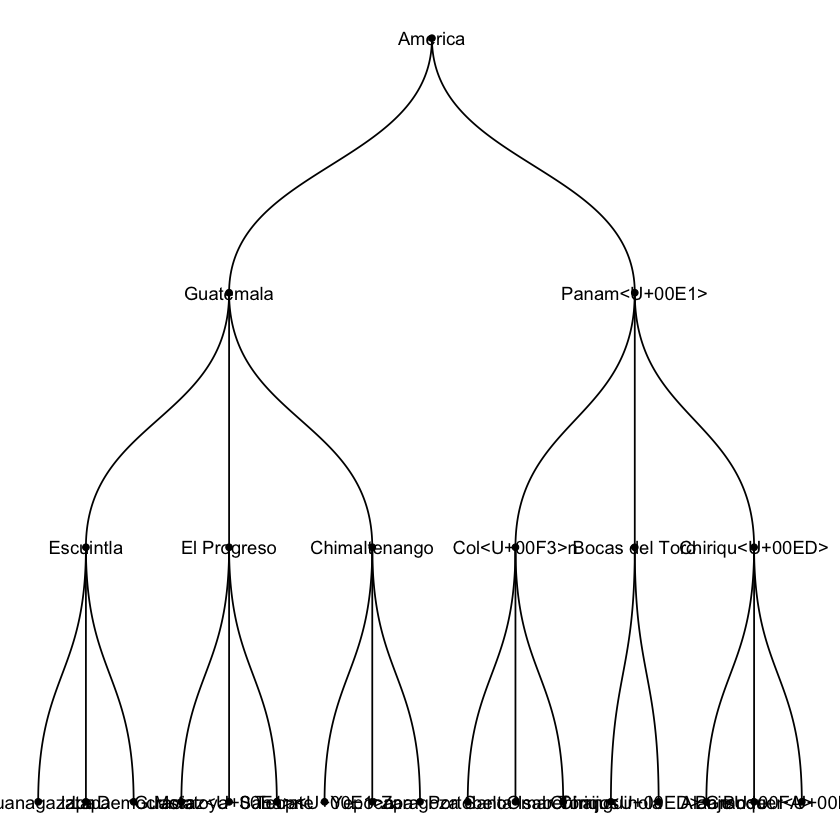

In [22]:
# Definir la estructura jerárquica
library(treemapify)
library(tidyverse)

continente <- c("America")
paises <- c("Guatemala", "Panamá")

estados <- c("Escuintla", "El Progreso", "Chimaltenango", "Colón", "Bocas del Toro", "Chiriquí")
municipios <- c(
    "Guanagazapa", "Iztapa", "La Democracia",
    "Guastatoya", "Morazán", "Sanarate",
    "Tecpán", "Yepocapa", "Zaragoza",
    "Portobelo", "Santa Isabel", "Omar Torrijos",
    "Bocas del Toro", "Changuinola", "Chiriquí Grande",
    "Alanje", "Barú", "Boquerón"
)

# Create edge data frames representing hierarchy
d1 <- data.frame(from= continente, to= paises)
d2 <- data.frame(from= rep(d1$to, each=3), to= estados)
d3 <- data.frame(from= rep(d2$to, each=3), to= municipios)

# Combine edge data frames
orillas <- rbind(d1, d2, d3)

# Create the graph object representing the hierarchy
g <- graph_from_data_frame(orillas)

# Generate dendrogram visualization
ggraph(g, layout = "dendrogram") +
    geom_edge_diagonal() +
    geom_node_point() +
    geom_node_text(aes(label = name)) +
    theme_void()

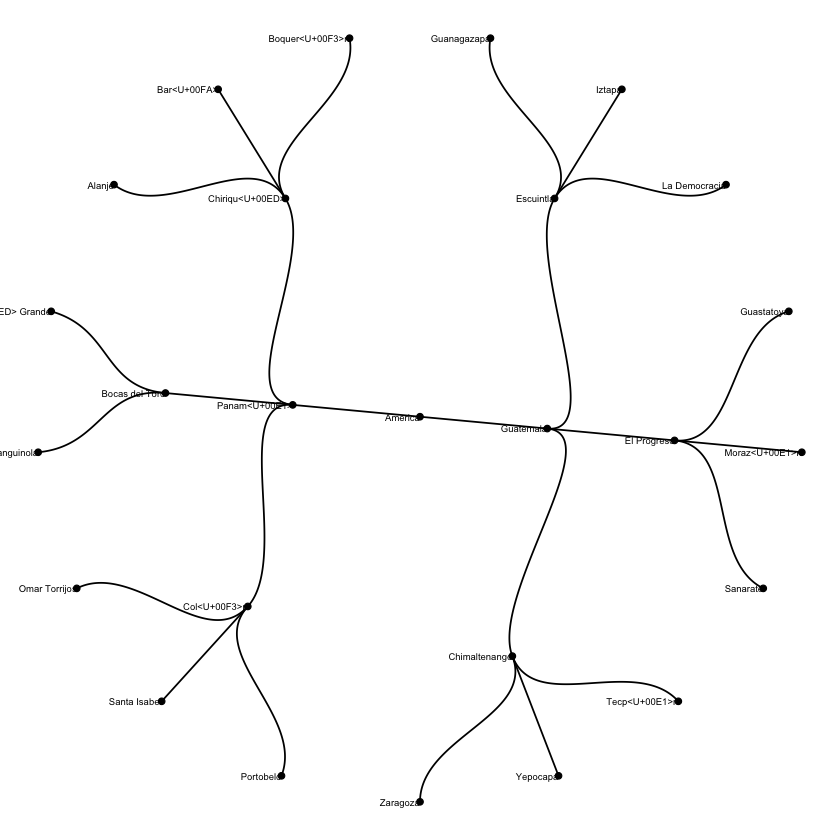

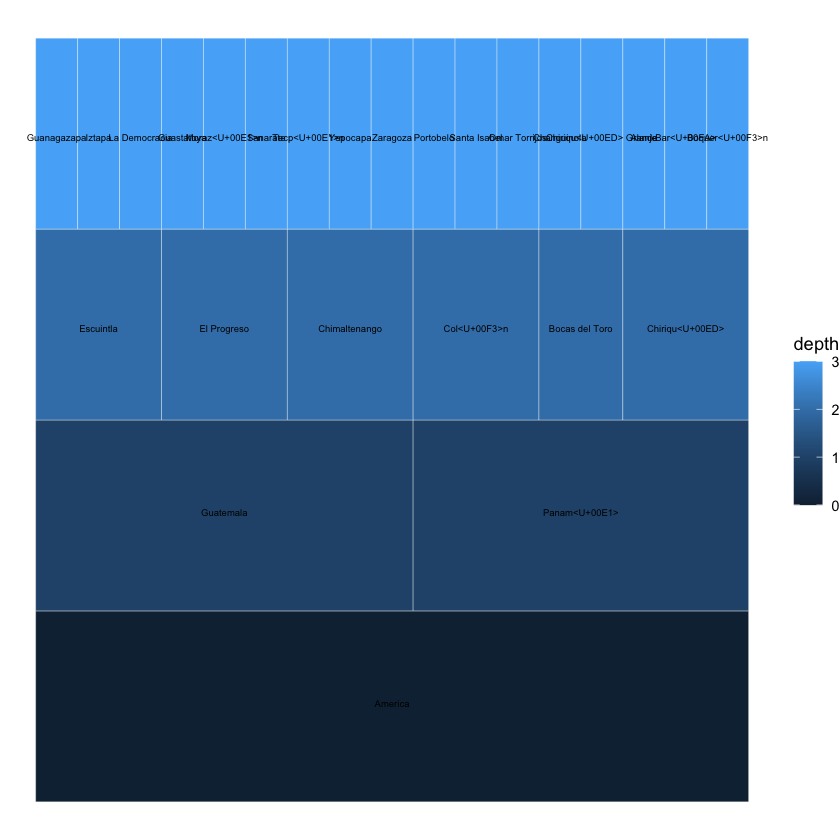

In [23]:
# Circular
ggraph(g, layout = "dendrogram", circular = TRUE) +
    geom_edge_diagonal() +
    geom_node_point() +
    geom_node_text(aes(label = name), hjust = 1, size = 2) +
    theme_void()


# Icicle
ggraph(g, layout = "partition") +
    geom_node_tile(aes(fill = depth), colour = "white") +
    geom_node_text(aes(label = name), size = 2, vjust = "inward") +
    theme_void()